## Investment and Portfolio Management - Group Project 
### Part 1: Index Replication *[15 points]*
In this part, you will **replicate a stock market index of your choice (must be different from other groups)** using **Yahoo! Finance data from 2021-01-01 to 2021-11-30**. You will have to complete the following tasks:
1. Construct the following indices using the index constituents *[12 points]*:
    * **Price-weighted (PW) index** *[4 points]*;
    * **Value-weighted (VW) index** *[4 points]*;
    * **Equal-weighted (EW) index** *[4 points]*.
2. Plot the **original index** and the **three constructed indices (initial value of 100)** *[3 points]*.

## 指數: Deutscher Aktienindex DAX 30 Index

In [1]:
import yfinance as yf
import pandas as pd

In [5]:
start_date = '2021-01-01'
end_date = '2021-11-30'
idx = '^GDAXI'

Index = yf.download(idx,
interval="1d", # daily frequency
start=start_date, end=end_date) 

Index.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-19,16269.219727,16282.870117,16092.629883,16159.969727,16159.969727,105496400
2021-11-22,16188.540039,16202.769531,16090.540039,16115.690430,16115.690430,65473700
2021-11-23,15987.200195,16054.379883,15866.009766,15937.000000,15937.000000,91000000
2021-11-24,15942.280273,15974.299805,15740.599609,15878.389648,15878.389648,87886600
2021-11-25,15928.379883,15962.540039,15885.839844,15896.320312,15896.320312,0


In [6]:
# only retain "Adj Close" Column
Index = pd.DataFrame(Index['Adj Close'].rename(idx)) # the actual index of DAX30
Index.head(3)

,^GDAXI
Date,
2021-01-04,13726.740234
2021-01-05,13651.219727
2021-01-06,13891.969727


[DAX 30 成分股](https://en.wikipedia.org/wiki/DAX)

In [7]:
page = pd.read_html('https://en.wikipedia.org/wiki/DAX')


In [10]:
type(page)
len(page)

9

In [16]:
page[3].head() # the data we want 

,Unnamed: 0,Company,Prime Standard Sector,Ticker symbol,Index weighting (%)1,Employees,Founded
0,NaN,Adidas,Footwear,ADS.DE,4.91,"57,016 (2018)",1924
1,NaN,Allianz,Financial Services,ALV.DE,7.22,"142,460 (2018)",1890
2,NaN,BASF,Basic Materials,BAS.DE,4.89,"122,404 (2018)",1865
3,NaN,Bayer,Healthcare,BAYN.DE,5.52,"110,838 (2018)",1863
4,NaN,BMW,Automobile,BMW.DE,2.00,"134,682 (2018)",1916


In [17]:
constit = page[3]['Ticker symbol']
constit.head(3)

0    ADS.DE
1    ALV.DE
2    BAS.DE
Name: Ticker symbol, dtype: object

[OutStanding VS Float share](https://www.investopedia.com/ask/answers/062315/what-difference-between-shares-outstanding-and-floating-stock.asp)

- Outstanding shares include those held by shareholders and company insiders. 
- Floating shares indicate the number of shares actually available for trading.

In [18]:
for i in constit:
    print(i)
    prc = yf.download(i, interval='1d', start=start_date, end=end_date)
    prc = pd.DataFrame(prc['Adj Close'])
    prc.columns = [i]

    try:
        df_prc = pd.concat([df_prc, prc], axis=1)
    except:
        df_prc = prc # only executes in the first i
    
    stk = yf.Ticker(i) # get the info of a particular stock
    try:
        stk.info['floatShares']
    except:
        stk.info['floatShares'] = None
        
    try:
        stk.info['sharesOutstanding']
    except:
        stk.info['sharesOutstanding'] = None

# calculate the market value of each constituent stocks
if stk.info['floatShares']:
    mcap = prc * stk.info['floatShares']
elif stk.info['sharesOutstanding']:
    mcap = prc * stk.info['sharesOutstanding']
else:
    mcap = prc * (stk.info['marketCap']/stk.info['previousClose'])

try:
    df_mcap = pd.concat([df_mcap, mcap], axis=1)
except:
    df_mcap = mcap # only executes in the first i


ADS.DE
[*********************100%***********************]  1 of 1 completed
ALV.DE
[*********************100%***********************]  1 of 1 completed
BAS.DE
[*********************100%***********************]  1 of 1 completed
BAYN.DE
[*********************100%***********************]  1 of 1 completed
BMW.DE
[*********************100%***********************]  1 of 1 completed
CON.DE
[*********************100%***********************]  1 of 1 completed
1COV.DE
[*********************100%***********************]  1 of 1 completed
DAI.DE
[*********************100%***********************]  1 of 1 completed
DHER.DE
[*********************100%***********************]  1 of 1 completed
DBK.DE
[*********************100%***********************]  1 of 1 completed
DB1.DE
[*********************100%***********************]  1 of 1 completed
DPW.DE
[*********************100%***********************]  1 of 1 completed
DTE.DE
[*********************100%***********************]  1 of 1 completed
DWNI.DE
[

In [20]:
df_prc.shape

(231, 30)

In [21]:
df_prc.head(3)

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,292.307343,190.011627,61.853455,47.473862,68.613251,117.900002,50.551113,55.889412,136.550003,8.791,...,209.856720,142.350006,210.118011,229.031296,35.022049,103.588997,114.593018,30.129999,145.024002,57.757359
2021-01-05,286.568085,188.060059,61.386387,47.652042,67.658432,116.949997,50.140442,55.879585,144.100006,8.850,...,208.376785,141.755844,210.316696,228.261765,34.291409,103.313599,114.359184,30.090000,143.812866,58.029797
2021-01-06,288.646088,197.837112,64.217407,49.535011,67.782555,115.699997,51.528889,55.427757,138.350006,9.380,...,216.763153,141.062668,205.647415,236.630386,35.616302,103.746368,118.743378,30.750000,144.027756,55.694595


In [27]:
# Price-weighted (PW) index
PWI = df_prc.sum(axis=1) # 將每天成分股的股價相加
PWI = pd.DataFrame(PWI.rename("PWI"))
PWI.shape

(231, 1)

In [29]:
df_mcap.shape # 共 231 個交易日每天的市值加總

(231, 1)

In [36]:
df_mcap.columns

Index(['VNA.DE'], dtype='object')

In [40]:
# Value-Weighted Index (VWI)
VWI = pd.DataFrame(df_mcap).rename(columns={'VNA.DE':'VWI'})
VWI

,VWI
Date,
2021-01-04,3.322534e+10
2021-01-05,3.338207e+10
2021-01-06,3.203872e+10
2021-01-07,3.183722e+10
2021-01-08,3.225142e+10
...,...
2021-11-19,3.004831e+10
2021-11-22,2.937961e+10
2021-11-23,2.843048e+10


In [46]:
df_prc.tail(3)

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-23,271.850006,203.250000,62.950001,48.685001,94.440002,106.779999,56.599998,90.040001,119.000000,11.180,...,292.350006,215.399994,183.350006,249.449997,32.500000,119.540001,153.339996,23.709999,177.300003,49.422203
2021-11-24,268.399994,203.100006,61.889999,47.470001,92.489998,104.720001,55.200001,88.370003,118.300003,11.450,...,291.950012,215.699997,187.149994,253.550003,32.730000,118.940002,151.940002,23.780001,172.380005,51.900002
2021-11-25,268.850006,202.300003,61.389999,47.419998,91.099998,103.820000,54.560001,88.080002,114.300003,11.462,...,292.750000,218.199997,187.199997,253.399994,34.720001,119.400002,152.820007,24.340000,172.580002,52.060001


In [47]:
# Equal-Weighted Index (EWI)
EWI = df_prc.pct_change().mean(axis=1)
EWI[0] = 0
EWI = EWI + 1 # 轉變為實際報酬
EWI = EWI.cumprod()
EWI = pd.DataFrame(EWI.rename('EWI'))
EWI.tail()

# 2021.11.26: EWI: 每個成分股的權重都是 1/n，所以整個指數每日的報酬就是所有成分股每日報酬的平均

,EWI
Date,
2021-11-19,1.120885
2021-11-22,1.118658
2021-11-23,1.107722
2021-11-24,1.105637
2021-11-25,1.105391


In [55]:
egg = df_prc.copy()
egg.pct_change().mean(axis=1)

egg[0] = 0
egg2 = egg + 1
egg2

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE,0
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,293.307343,191.011627,62.853455,48.473862,69.613251,118.900002,51.551113,56.889412,137.550003,9.791,...,143.350006,211.118011,230.031296,36.022049,104.588997,115.593018,31.129999,146.024002,58.757359,1
2021-01-05,287.568085,189.060059,62.386387,48.652042,68.658432,117.949997,51.140442,56.879585,145.100006,9.850,...,142.755844,211.316696,229.261765,35.291409,104.313599,115.359184,31.090000,144.812866,59.029797,1
2021-01-06,289.646088,198.837112,65.217407,50.535011,68.782555,116.699997,52.528889,56.427757,139.350006,10.380,...,142.062668,206.647415,237.630386,36.616302,104.746368,119.743378,31.750000,145.027756,56.694595,1
2021-01-07,286.479584,197.210800,66.208740,51.392220,68.811195,118.400002,53.995556,57.763603,135.399994,10.583,...,143.201477,207.442200,234.167496,36.908558,103.802139,122.101105,32.860001,145.750519,56.344315,1
2021-01-08,293.010498,197.832611,66.370781,50.602432,68.305145,120.099998,53.976002,57.665379,136.550003,10.519,...,142.359741,209.727173,234.359894,38.652355,105.434860,121.808823,34.430000,144.051025,57.064335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-19,283.350006,203.750000,62.610001,49.134998,94.199997,106.839996,57.299999,90.790001,129.300003,11.824,...,222.000000,181.850006,248.199997,33.750000,126.879997,156.199997,25.299999,181.639999,53.234547,1
2021-11-22,279.950012,204.050003,62.930000,49.200001,95.779999,108.440002,57.639999,91.970001,126.000000,11.864,...,222.300003,183.149994,248.250000,33.419998,122.660004,156.919998,24.930000,180.259995,52.072109,1
2021-11-23,272.850006,204.250000,63.950001,49.685001,95.440002,107.779999,57.599998,91.040001,120.000000,12.180,...,216.399994,184.350006,250.449997,33.500000,120.540001,154.339996,24.709999,178.300003,50.422203,1


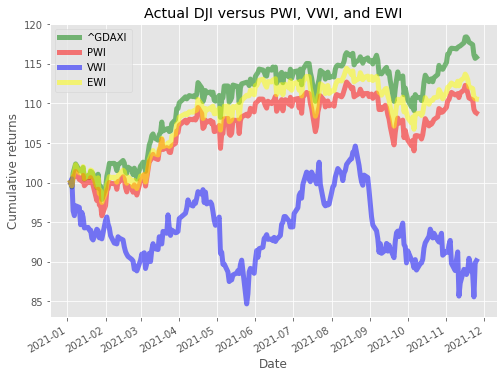

In [44]:
# Plotting
import matplotlib.pyplot as plt

TS = Index.join([PWI,VWI,EWI]) # compare the actual data and the three different weighted index
TS = TS.divide(TS.iloc[0] / 100) # 設定初始值為 100

plt.style.use('ggplot')
fig = TS.plot(color=["green","red","blue","yellow"],alpha=0.5,linewidth=5)
plt.rcParams["figure.figsize"] = (10, 10) 

plt.title('Actual DJI versus PWI, VWI, and EWI')
plt.legend(loc='best')
plt.ylabel('Cumulative returns')
plt.show()